<a href="https://colab.research.google.com/github/mel-108/Melwin/blob/main/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
from google.colab import files
Uploaded=files.upload()

Saving customer_satisfaction_survey_fixed_1.csv to customer_satisfaction_survey_fixed_1.csv


In [ ]:
from google.colab import files
Uploaded=files.upload()

Saving customer_support_tickets.csv to customer_support_tickets.csv


In [ ]:

#loading the customer support tickets dataset

Data=pd.read_csv("customer_support_tickets.csv")
df=pd.DataFrame(Data)
print(df)

      Ticket ID        Customer Name              Customer Email  \
0             1        Marisa Obrien  carrollallison@example.com   
1             2         Jessica Rios    clarkeashley@example.com   
2             3  Christopher Robbins   gonzalestracy@example.com   
3             4     Christina Dillon    bradleyolson@example.org   
4             5    Alexander Carroll     bradleymark@example.com   
...         ...                  ...                         ...   
8464       8465           David Todd          adam28@example.net   
8465       8466           Lori Davis       russell68@example.com   
8466       8467      Michelle Kelley        ashley83@example.org   
8467       8468     Steven Rodriguez         fpowell@example.org   
8468       8469      Steven Davis MD          lori20@example.net   

      Customer Age Customer Gender       Product Purchased Date of Purchase  \
0               32           Other              GoPro Hero       2021-03-22   
1               42       

In [ ]:

#loading the customer satisfaction survey fixed dataset

Datasett=pd.read_csv("customer_satisfaction_survey_fixed_1.csv")
df1=pd.DataFrame(Datasett)
print(df1)

   Customer_ID  Income Educational_Level  Purchase_Frequency  \
0     CUST1000  141958          Bachelor                  39   
1     CUST1001   35795               PhD                  49   
2     CUST1002   20860          Bachelor                  32   
3     CUST1003  123694          Bachelor                   4   
4     CUST1004  148106          Bachelor                  30   
..         ...     ...               ...                 ...   
95    CUST1095   72995               PhD                  29   
96    CUST1096   60757       High School                   3   
97    CUST1097   29692            Master                  20   
98    CUST1098   65758            Master                  36   
99    CUST1099  149425               PhD                  19   

    Customer_Service_Interactions  Feedback_Score  
0                               9               1  
1                               2               3  
2                               2               2  
3                      

In [ ]:

#df.reset index resets the index of dataframe df back to 0,1,2
#drop True ie old index column is not added back as a separate column
# ensuring that rows are aligned properly for concatination
# pdf.concat ie concatinating two dataframes arranging them by columnwise because axis 1

Dataset = pd.concat([df.reset_index(drop=True),
                         df1.reset_index(drop=True)], axis=1)
print(Dataset.head())

   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   
2           Other          Dell XPS       2020-07-14  Technical issue   
3          Female  Microsoft Office       2020-11-13  Billing inquiry   
4          Female  Autodesk AutoCAD       2020-02-04  Billing inquiry   

             Ticket Subject  \
0             Product setup   
1  Peripheral compatibil

In [ ]:

#printing first 5 rows of the Dataset
print(Dataset.columns)

#printing Dataset information
print(Dataset.info())

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating', 'Customer_ID', 'Income',
       'Educational_Level', 'Purchase_Frequency',
       'Customer_Service_Interactions', 'Feedback_Score'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Ticket ID                      8469 non-null   int64  
 1   Customer Name                  8469 non-null   object 
 2   Customer Email                 8469 non-null   object 
 3   Customer Age                   8469 non-null   int64  
 4   Custom

In [ ]:
#2. DATA PREPROCESSING

#checking for missing values
print(Dataset.isnull().sum())

Ticket ID                           0
Customer Name                       0
Customer Email                      0
Customer Age                        0
Customer Gender                     0
Product Purchased                   0
Date of Purchase                    0
Ticket Type                         0
Ticket Subject                      0
Ticket Description                  0
Ticket Status                       0
Resolution                       5700
Ticket Priority                     0
Ticket Channel                      0
First Response Time              2819
Time to Resolution               5700
Customer Satisfaction Rating     5700
Customer_ID                      8369
Income                           8369
Educational_Level                8369
Purchase_Frequency               8369
Customer_Service_Interactions    8369
Feedback_Score                   8369
dtype: int64


In [ ]:
#2. DATA PREPROCESSING

df_clean=Dataset.dropna()

#filling the missing values with mean value for only numeric columns
df_clean1=df_clean.fillna(df_clean.mean(numeric_only=True))

print(df_clean1.isnull().sum())

Ticket ID                        0
Customer Name                    0
Customer Email                   0
Customer Age                     0
Customer Gender                  0
Product Purchased                0
Date of Purchase                 0
Ticket Type                      0
Ticket Subject                   0
Ticket Description               0
Ticket Status                    0
Resolution                       0
Ticket Priority                  0
Ticket Channel                   0
First Response Time              0
Time to Resolution               0
Customer Satisfaction Rating     0
Customer_ID                      0
Income                           0
Educational_Level                0
Purchase_Frequency               0
Customer_Service_Interactions    0
Feedback_Score                   0
dtype: int64


In [ ]:
print(df_clean1['Educational_Level'].value_counts())

Educational_Level
High School    11
PhD             9
Master          9
Bachelor        7
Name: count, dtype: int64


In [ ]:
# Encoding categorical variables using labelEncoder

# LabelEncoder() ie used to convert categorical text to numeric labbel
le=LabelEncoder()
#for example Master=2, bachelor=0,phd=3 and high school=1
#fit() ie finds all unique categories of the column
# transform ie converts each category into numeric label
df_clean1['Educational_Level']=le.fit_transform(df_clean1['Educational_Level'])

print(df_clean1['Educational_Level'].value_counts())

Educational_Level
1    11
3     9
2     9
0     7
Name: count, dtype: int64


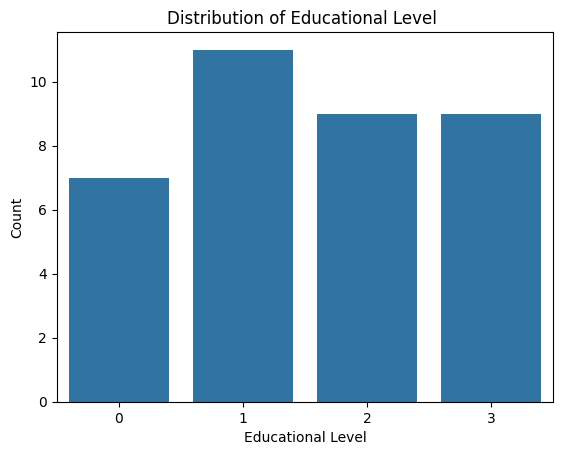

In [ ]:

#Dataset['Educational_Level'] != 4 this creates a Boolean series(True/False)
#if the value is not equal to 4 then return True othrrwise False
#Dataset[] passing a Boolean series inside the square bracket filters the dataframe
# the filtered dataframe is assigned to variable df edu it contains all rows excluding 4

df_edu = df_clean1[df_clean1['Educational_Level'] != 4]

#plotting a count plot for Educational_Level
sns.countplot(x='Educational_Level', data=df_edu)
plt.title('Distribution of Educational Level ')
plt.xlabel('Educational Level')
plt.ylabel('Count')
plt.show()

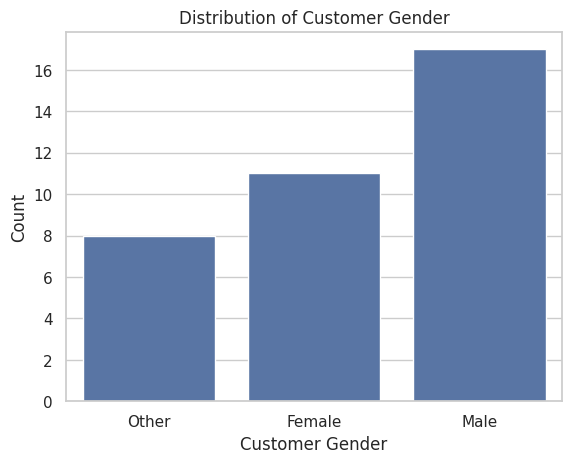

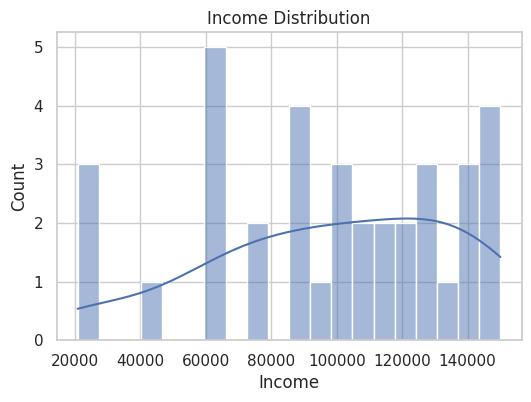

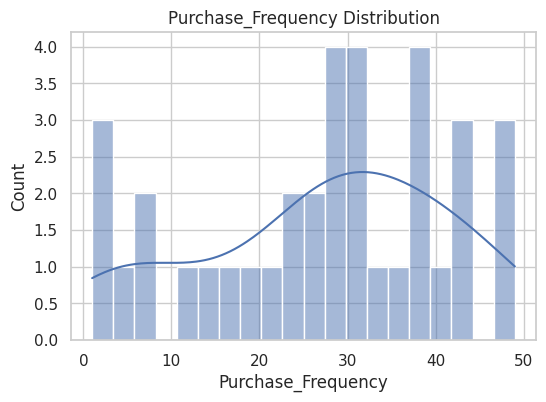

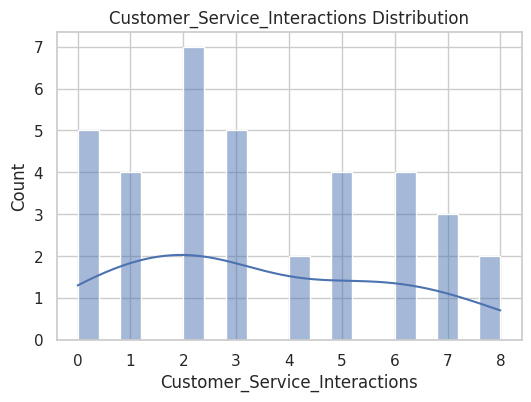

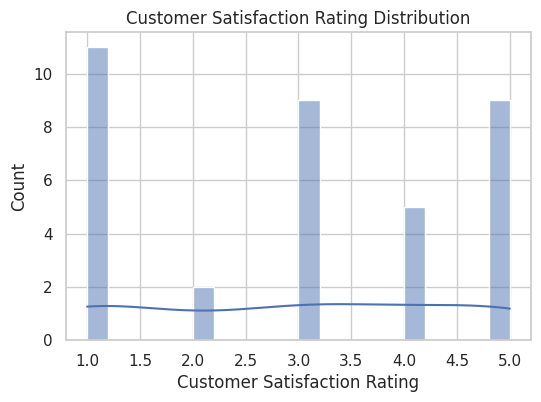

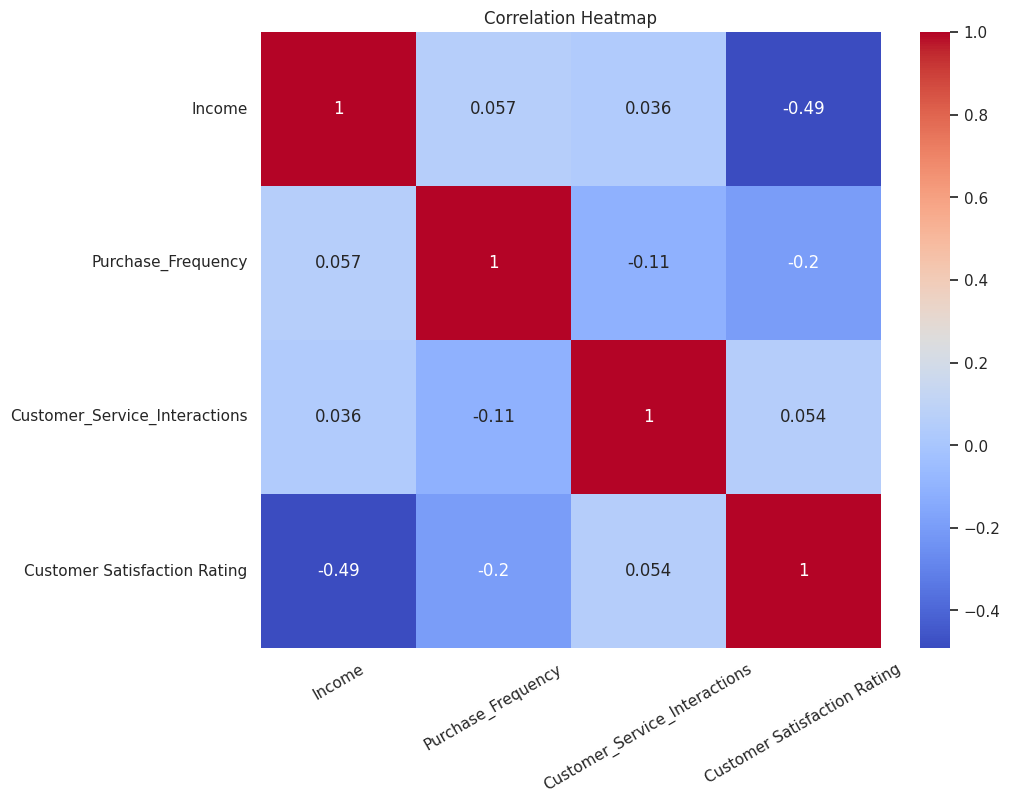

In [ ]:


#3. EXPLORATORY DATA ANALYSIS
# Analysing the numeric columns and visualising them using histogram
# visualising the correlation of numeric columns using heatmap

sns.set(style="whitegrid")

sns.countplot(x='Customer Gender', data=df_clean1)
plt.title('Distribution of Customer Gender')
plt.xlabel('Customer Gender')
plt.ylabel('Count')
plt.show()

#creates a lst numeric colls
numeric_cols = ['Income', 'Purchase_Frequency', 'Customer_Service_Interactions', 'Customer Satisfaction Rating']
# visualing the numeric columns using for loop
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_clean1[col], bins=20, kde=True)
    plt.title(f'{col} Distribution')
    plt.show()

#creating the correlation heatmap to see how numeric features relate to each other
#Dataset[numeric_cols].corr() creating a correlation matrix of numeric columns
# 1 ie perfect positive correlation ,-1 ie perfect negative correlation and 0 ie  no correction
#annot true writes the correlation values in the heatmap
#cmap coolwarm.ie uses a red blue colour scheme where negative represents blue and positive represents red

plt.figure(figsize=(10,8))
corr = df_clean1[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.xticks(rotation=30)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#3. Feature Engineering
#defining the feature set x and the target variable y
#building the feature matrix x
# dataset.drop returns a new dataframe with the specified columns removed
#axis =1 ie droping a column,axis =0 ie droping the rows

#x contains all columns except target
X = df_clean1.drop('Customer Satisfaction Rating', axis=1)

#creating a target variable y that contains columns that we want to predict
# y is a pandas series aligned row for row with x
y = df_clean1['Customer Satisfaction Rating']

# Spliting  the dataset into training 80% and testing 20%
#test size =0.2 ie 20% of data goes to test set and 80% of data goes to training set
# random state=42 ie fixes the random seed so you get the same split every run
#x train,y train ie used to train the model
#x test, y test ie used to evaluate the model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (28, 22)
Shape of X_test: (8, 22)
Shape of y_train: (28,)
Shape of y_test: (8,)


In [ ]:
#4. FEATURE SCALING
# Selecting only numeric columns from X_train and X_test
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# creating a scaler object that learn the mean and std of each numeric columns from the training data
scaler = StandardScaler()

# Fit on training numeric columns learning mean and stdd
#then  transform them by apply standarisation returns as numpy array
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
#Transforms the test numeric columns using the same mean and std learned from training data
X_test_scaled = scaler.transform(X_test[numeric_cols])

#Converting the scaled array back to DataFrame with column names
# restores original column names and row indices so everything lines up neatly
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_cols, index=X_test.index)

print("Scaled training set shape:", X_train_scaled.shape)
print("Scaled testing set shape:", X_test_scaled.shape)

Scaled training set shape: (28, 7)
Scaled testing set shape: (8, 7)


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#5. MODEL BUILDING

#creating a random forest classifier an ensemble of many decision trees
# n estimators=100 builds 100 trees
#random state =42 ie fixes the randomness so that the results are reproducible
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

#Training the model using training data
# each tree is fit on a bootstrap sample of rows and at each split
# it considers a random subset of features this decorrrelates trees and improve generalisation
rf_model.fit(X_train_scaled, y_train)

#using the trained forest to Predict customer satisfaction on test data
#each tree votes for a class , the forest returns the majority  vote
y_pred = rf_model.predict(X_test_scaled)

In [ ]:
#6.MODEL EVALUATION

# printing the accuracy ie number of correct prediction/total prediction
# classification report shows the precision,recall and f1 score and support per class,plus macro and weighted averages
# precision tp/tp+fp among the predicted classes how many are rightt
#recall tp/tp+fn how many actual class members we find
#f1 score ie harmonic mean of precision and recall
# support ie number of true instances of each class in y_test

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.125

Classification Report:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         4
         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         0
         5.0       0.50      0.33      0.40         3

    accuracy                           0.12         8
   macro avg       0.12      0.08      0.10         8
weighted avg       0.19      0.12      0.15         8



In [ ]:
#8. FUTURE PROJECTIONS

# Converting  the Date of Purchase column to pandas datetime format
#this allows us to perform time based operations
Dataset['Date of Purchase'] = pd.to_datetime(Dataset['Date of Purchase'])

#Dataset['Date of Purchase'].dt.to_period('M') ie converting each date tp a monthly period
#group by calculates the average customer satisfaction rating for each month
#thos produces time series where each row corresponds to a month and it's mean rating
# monthly aggregation makes the series smoother than using daily values
ts_data = Dataset.groupby(Dataset['Date of Purchase'].dt.to_period('M'))['Customer Satisfaction Rating'].mean()

#fillna() replaced the missing values with the previous month s value
# this ensures that the time series has no gaps
ts_data = ts_data.fillna(method='ffill')  # filling  missing values

#Ensuring that ts data is a dataframe
ts_data = ts_data.to_frame()

# converting the monthly period back to timestamp
#that can be used as LSTM input preparation
ts_data.index = ts_data.index.to_timestamp()

In [ ]:
#this scales the data to 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))

#extracts the numpy array from the dataframe
#fit computes the min max  of the data
# scales the min max data to 0 and 1
scaled_data = scaler.fit_transform(ts_data.values)

In [ ]:

#defining a function create_sequences that prepared input output pairs for LSTM
# X will store the sequence of past observation
#y will store the next value which we want to predict
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):

        #data[i:i+seq_length]) takes the slice of seq length consecutive data points this is lstm input
        X.append(data[i:i+seq_length])
        #(data[i+seq_length]) the next value after the sequence this is lstm target/output
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)
#converting the lists x and y into numpy array
#lstm uses keras and tensorflow require numpy array as input

#setting the sequence length to 12
seq_length = 12  #using the  last 12 months to predict next month
#calling the function with scaled data
#x input sequence as shape ,y target shape
X, y = create_sequences(scaled_data, seq_length)

#lstm expects input in 3d [samples, timesteps, features]
#samples number of sequence
#timesteps length of each sequence
# features number of features per timestep
#reshaping the x (num_sample,seq length)  to (num_sample,seq_lenght,1)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [ ]:
#creating a keras sequencial model is a stack of layer
#each layer is add one after the another
model = Sequential()

#adds a lstm layer with 50 units
#input_shape=(X.shape[1],X.shape[2]) specifies the shape of each input sequence
#(timsteps, features )
#this layer learns temporal patterns from sequence
model.add(LSTM(50, activation='relu', input_shape=(X.shape[1], X.shape[2])))

#;adds a dence layer with 1 neuron
#this is a output layer predicts single value
model.add(Dense(1))

# compiling the model for training
#optimizer=Adam ie uses the Adam optimiser for efficient gradient descent
#loss=mse ie mean squared error as the loss function
model.compile(optimizer='adam', loss='mse')

# trains the model on your data(x,y)
#epochs=50 goes through the entire dataset 50 times
# batch size 16 ie updates the weight after every 16 samples
# verbose 1 shows the progress bar during training
model.fit(X, y, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.3561
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.3400
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3251
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.3115
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2989
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.2872
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.2762
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2661
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2565
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.2471
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2379
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2290
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2203
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2118
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.2036
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━

In [ ]:

#setting the future time steps that we want to forecast

future_steps = 12
future_preds = []# an empty list to store predicted values

#takes the most recent window of data from the scaled series
# Reshapes it into 3d (batch 1,timesteps =sequence length, feature=1)
last_seq = scaled_data[-seq_length:].reshape(1, seq_length, 1)

for _ in range(future_steps):
    next_val = model.predict(last_seq)
    future_preds.append(next_val[0,0])
    # Update the sequence
    last_seq = np.append(last_seq[:,1:,:],next_val.reshape(1,1,1), axis=1)

# Inverse scale to original rating values
future_preds = scaler.inverse_transform(np.array(future_preds).reshape(-1,1))

# Create future dates
future_dates = pd.date_range(ts_data.index[-1] + pd.DateOffset(months=1), periods=future_steps, freq='M')

future_df = pd.DataFrame({'Date': future_dates, 'Projected_Rating': future_preds.flatten()})
print(future_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
         Date  Projected_Rating
0  2022-01-31          2.923142
1  2022-02-28          2.923116
2  2022-03-31          2.930504
3  2022-04-30          2.924585
4  2022-05-31          2.915708
5  2022-06-30          2.915174
6  2022-07-31          2.914293
7  2022-08-31          2.917516
8  2022-09-30          2.921157
9  2022-10-31          2.925944
10 2022-11-30          2.926674
11 2022-12-31          2.924791


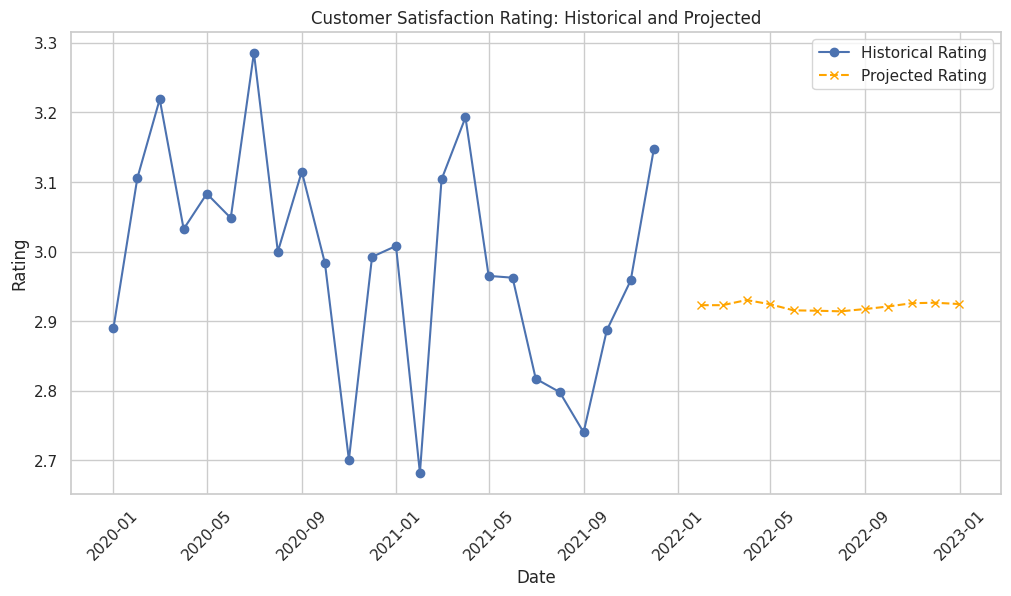

In [ ]:


# Plot historical data
plt.figure(figsize=(12,6))
plt.plot(ts_data.index, ts_data.values, label='Historical Rating', marker='o')

# Plot future projections
plt.plot(future_df['Date'], future_df['Projected_Rating'], label='Projected Rating', marker='x', linestyle='--', color='orange')

# Formatting
plt.title('Customer Satisfaction Rating: Historical and Projected')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()